In [71]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [72]:
# read data cloud
df = pd.read_csv('sonos_all_data-6m\sonoff_cloud_dump_2019-08-01-2020-06-08.csv')
# convert epoch time to datetime

df['time'] = pd.to_datetime(df['time']/1000000000,unit='s')
df[-10:]

,name,time,mean_power,mean_current,mean_voltage
2695671,mqtt_consumer,2020-06-07 23:58:30,134.0,0.6815,246.0
2695672,mqtt_consumer,2020-06-07 23:58:40,133.0,0.6810,246.5
2695673,mqtt_consumer,2020-06-07 23:58:50,133.5,0.6855,246.0
2695674,mqtt_consumer,2020-06-07 23:59:00,134.0,0.6865,246.5
2695675,mqtt_consumer,2020-06-07 23:59:10,133.0,0.6790,247.0
2695676,mqtt_consumer,2020-06-07 23:59:20,133.0,0.6795,247.0
2695677,mqtt_consumer,2020-06-07 23:59:30,136.0,0.6920,247.0
2695678,mqtt_consumer,2020-06-07 23:59:40,133.5,0.6845,247.0
2695679,mqtt_consumer,2020-06-07 23:59:50,133.5,0.6825,246.5
2695680,mqtt_consumer,2020-06-08 00:00:00,133.0,0.7150,247.0


In [73]:
df=df.set_index(df['time'])['2019-12-23 00:00:00' :'2020-06-07 23:59:50']
df=df[['time','mean_power']]
df.head()

,time,mean_power
time,,
2019-12-23 00:00:00,2019-12-23 00:00:00,89.5
2019-12-23 00:00:10,2019-12-23 00:00:10,88.0
2019-12-23 00:00:20,2019-12-23 00:00:20,88.5
2019-12-23 00:00:30,2019-12-23 00:00:30,88.5
2019-12-23 00:00:40,2019-12-23 00:00:40,88.5


In [74]:
# extract rows, when the mean_voltage is not NaN
#df = df[df['mean_voltage'].notna()].reset_index()
#df.set_index('time', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1451520 entries, 2019-12-23 00:00:00 to 2020-06-07 23:59:50
Data columns (total 2 columns):
time          1451520 non-null datetime64[ns]
mean_power    1388702 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.2 MB


In [75]:
# prepare data 
df['time'] = pd.to_datetime(df['time'])
df['weekofyear']=df['time'].dt.week
df['day_name']=df['time'].dt.weekday
df['hour']=df['time'].dt.hour
df['mins']=df['time'].dt.minute

# prepare weekday, weekend, and holiday columns
df['day_type'] = df['day_name'].apply(lambda x: 'weekday' if x <5 else 'weekend')



df['weekofyear']=df['weekofyear'].apply(lambda x:-2 if x==51 else (-1 if x==52 else x) )
df['kWh']=df['mean_power']/1000*1/60*1/60*10
# lockdown
df.loc[df.weekofyear >12, 'day_type'] = 'holiday'
# christmas eve
df.loc[(df.weekofyear== -1) & (df.day_name==1 ) ,'day_type']='holiday'
# christmas
df.loc[(df.weekofyear== -1) & (df.day_name==2 ) ,'day_type']='holiday'
# new year
df.loc[(df.weekofyear== 1) & (df.day_name==2 ) ,'day_type']='holiday'

In [6]:
df[300000:]

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
time,,,,,,,,
2020-01-26 17:20:00,2020-01-26 17:20:00,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:20:10,2020-01-26 17:20:10,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:20:20,2020-01-26 17:20:20,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:20:30,2020-01-26 17:20:30,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:20:40,2020-01-26 17:20:40,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:20:50,2020-01-26 17:20:50,NaN,4,6,17,20,weekend,NaN
2020-01-26 17:21:00,2020-01-26 17:21:00,NaN,4,6,17,21,weekend,NaN
2020-01-26 17:21:10,2020-01-26 17:21:10,NaN,4,6,17,21,weekend,NaN
2020-01-26 17:21:20,2020-01-26 17:21:20,NaN,4,6,17,21,weekend,NaN


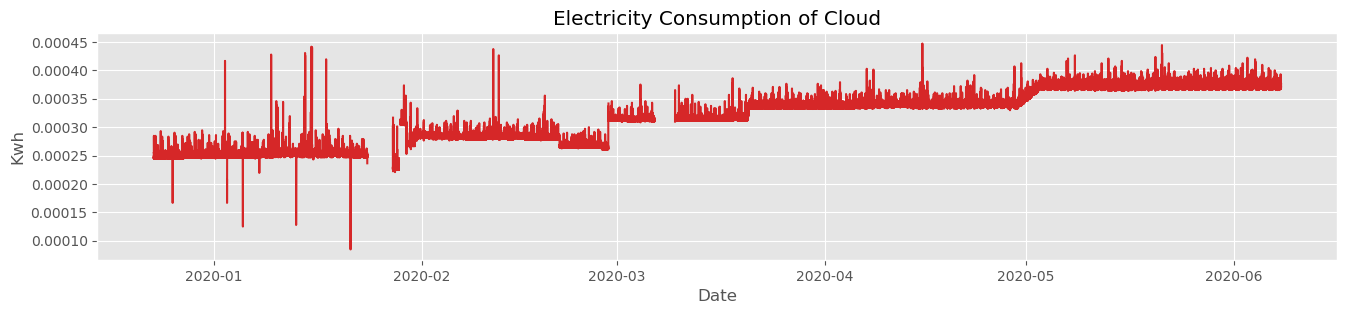

In [76]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Kwh', dpi=100):
    plt.figure(figsize=(16,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['time'], y=df['kWh'], title='Electricity Consumption of Cloud')

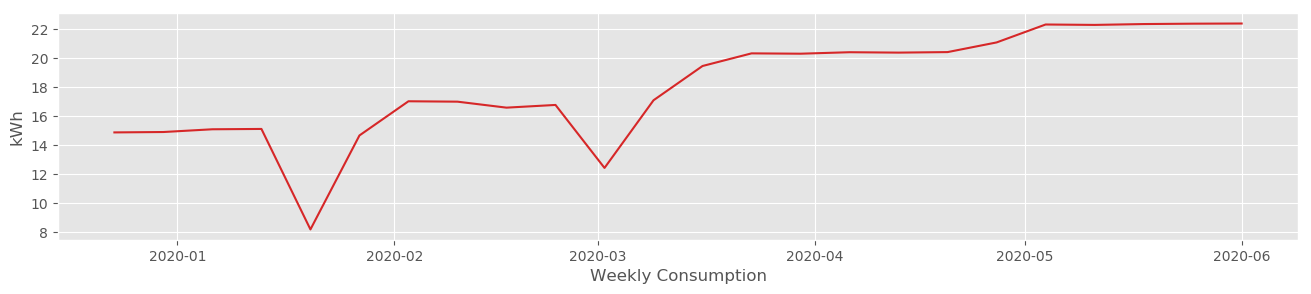

In [77]:
# prepare summed weekly, daily, and hourly patterns
week = pd.DataFrame({'Week_kWh' : (df.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
# the date is made here by using date_range
week['week_date'] = pd.date_range(start="12/17/2019", end="06/07/2020", freq='W-MON')
plot_df(week, x=week.week_date, y=week.Week_kWh, xlabel='Weekly Consumption',ylabel='kWh', title='') 

In [40]:
week

,weekofyear,Week_kWh,week_date
0,-1,14.877890,2019-12-23
1,1,14.904895,2019-12-30
2,2,15.094130,2020-01-06
3,3,15.116967,2020-01-13
4,4,8.183771,2020-01-20
5,5,14.667831,2020-01-27
6,6,17.026730,2020-02-03
7,7,16.999116,2020-02-10
8,8,16.586382,2020-02-17
9,9,16.773185,2020-02-24


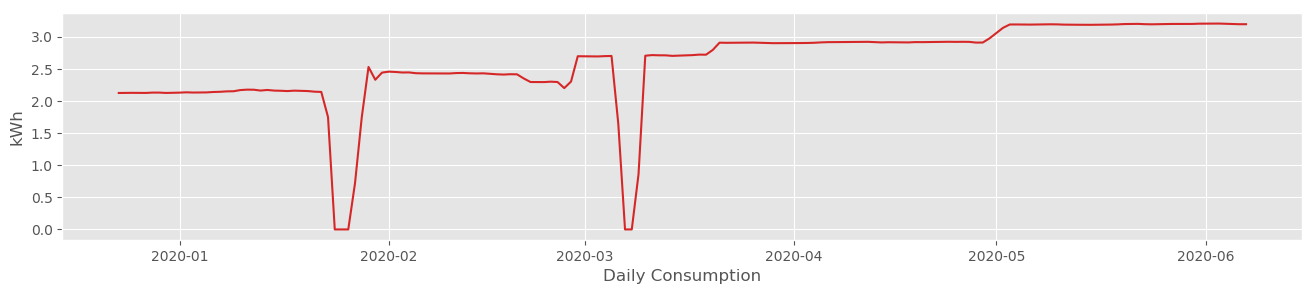

In [78]:
# prepare summed weekly, daily, and hourly patterns
day = pd.DataFrame({'day_kWh' : (df.groupby( ['weekofyear','day_name'])['kWh'].sum())}).reset_index()
day['day_date'] = pd.date_range(start="12/23/2019", end="06/07/2020", freq='D')
plot_df(day, x=day.day_date, y=day.day_kWh, xlabel='Daily Consumption',ylabel='kWh', title='') 

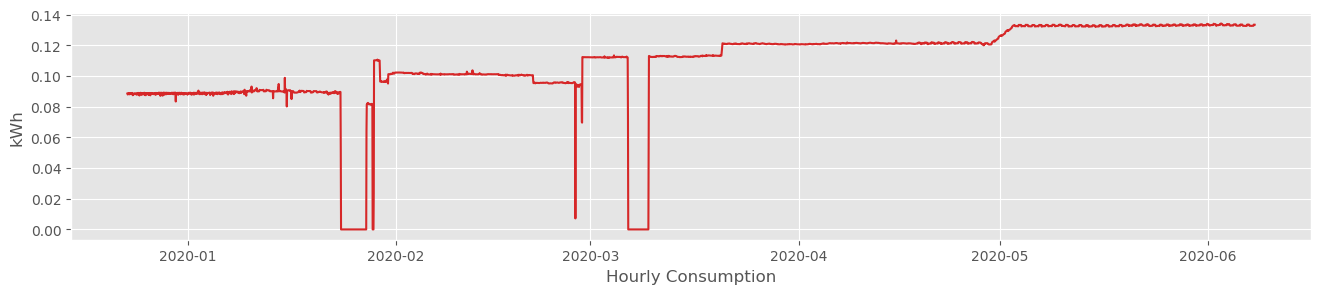

In [79]:
# prepare summed weekly, daily, and hourly patterns
hour = pd.DataFrame({'hour_kWh' : (df.groupby( ['weekofyear','day_name','hour'])['kWh'].sum())}).reset_index()
hour['hour_index'] = pd.date_range(start="12/23/2019", end="06/07/2020 23:00:00", freq='H')
plot_df(hour, x=hour.hour_index, y=hour.hour_kWh, xlabel='Hourly Consumption',ylabel='kWh', title='') 

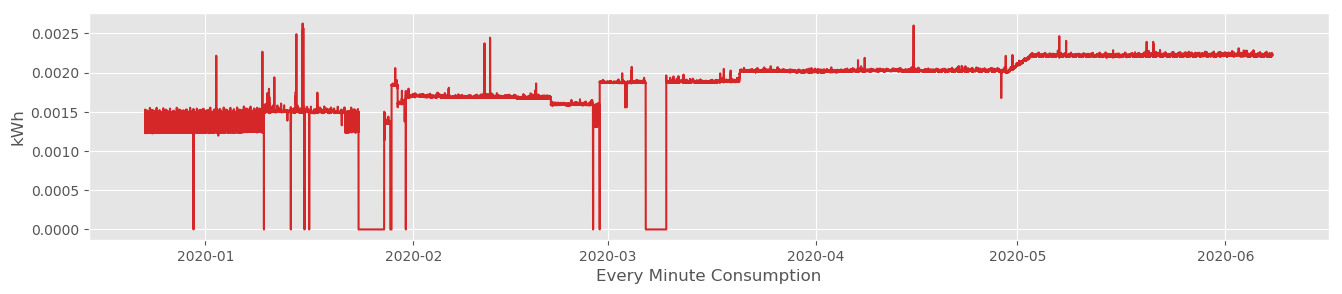

In [80]:
# prepare summed weekly, daily, and hourly patterns
minute = pd.DataFrame({'minute_kWh' : (df.groupby( ['weekofyear','day_name','hour','mins'])['kWh'].sum())}).reset_index()
minute['mins_index'] = pd.date_range(start="12/23/2019", end="06/07/2020 23:59:00", freq='T')
plot_df(minute, x=minute.mins_index, y=minute.minute_kWh, xlabel='Every Minute Consumption',ylabel='kWh', title='') 

In [68]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,18.079133
std,7.144345,3.701204
min,-1.000000,8.183771
25%,5.750000,15.111258
50%,11.500000,18.277983
75%,17.250000,20.586311
max,23.000000,22.391349


In [70]:
day.describe()

,weekofyear,day_name,day_kWh
count,168.000000,168.000000,168.000000
mean,11.458333,3.000000,2.582733
std,7.014830,2.005979,0.637976
min,-1.000000,0.000000,0.000000
25%,5.750000,1.000000,2.269115
50%,11.500000,3.000000,2.710655
75%,17.250000,5.000000,2.918399
max,23.000000,6.000000,3.203781


In [76]:
week

,weekofyear,Week_kWh,week_date
0,-1,14.877890,2019-12-23
1,1,14.904895,2019-12-30
2,2,15.094130,2020-01-06
3,3,15.116967,2020-01-13
4,4,8.183771,2020-01-20
5,5,14.667831,2020-01-27
6,6,17.026730,2020-02-03
7,7,16.999116,2020-02-10
8,8,16.586382,2020-02-17
9,9,16.773185,2020-02-24


In [71]:
hour.describe()

,weekofyear,day_name,hour,hour_kWh
count,4032.000000,4032.000000,4032.000000,4032.000000
mean,11.458333,3.000000,11.500000,0.107614
std,6.994788,2.000248,6.923045,0.027610
min,-1.000000,0.000000,0.000000,0.000000
25%,5.750000,1.000000,5.750000,0.095412
50%,11.500000,3.000000,11.500000,0.113006
75%,17.250000,5.000000,17.250000,0.121825
max,23.000000,6.000000,23.000000,0.134278


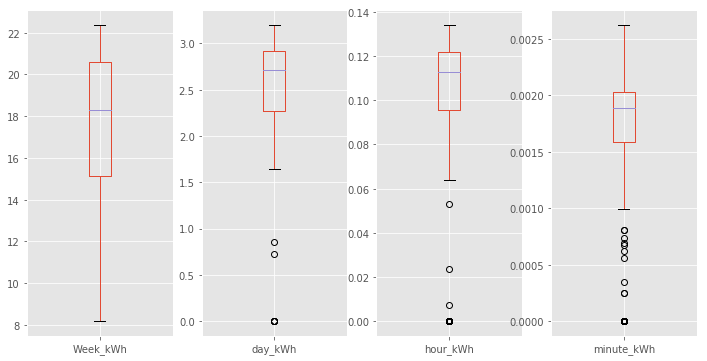

In [81]:
# boxplots of power consumption 
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
weekbp = week.boxplot(column=['Week_kWh'])

plt.subplot(1, 4, 2)
daybp = day.boxplot(column=['day_kWh'])

plt.subplot(1, 4, 3)
hourbp = hour.boxplot(column=['hour_kWh'])

plt.subplot(1, 4, 4)
minsbp = minute.boxplot(column=['minute_kWh'])

In [75]:
day.loc[day['day_kWh']<1.5]

,weekofyear,day_name,day_kWh,day_date
32,4,4,0.000000,2020-01-24
33,4,5,0.000000,2020-01-25
34,4,6,0.000000,2020-01-26
35,5,0,0.720292,2020-01-27
75,10,5,0.000000,2020-03-07
76,10,6,0.000000,2020-03-08
77,11,0,0.858465,2020-03-09


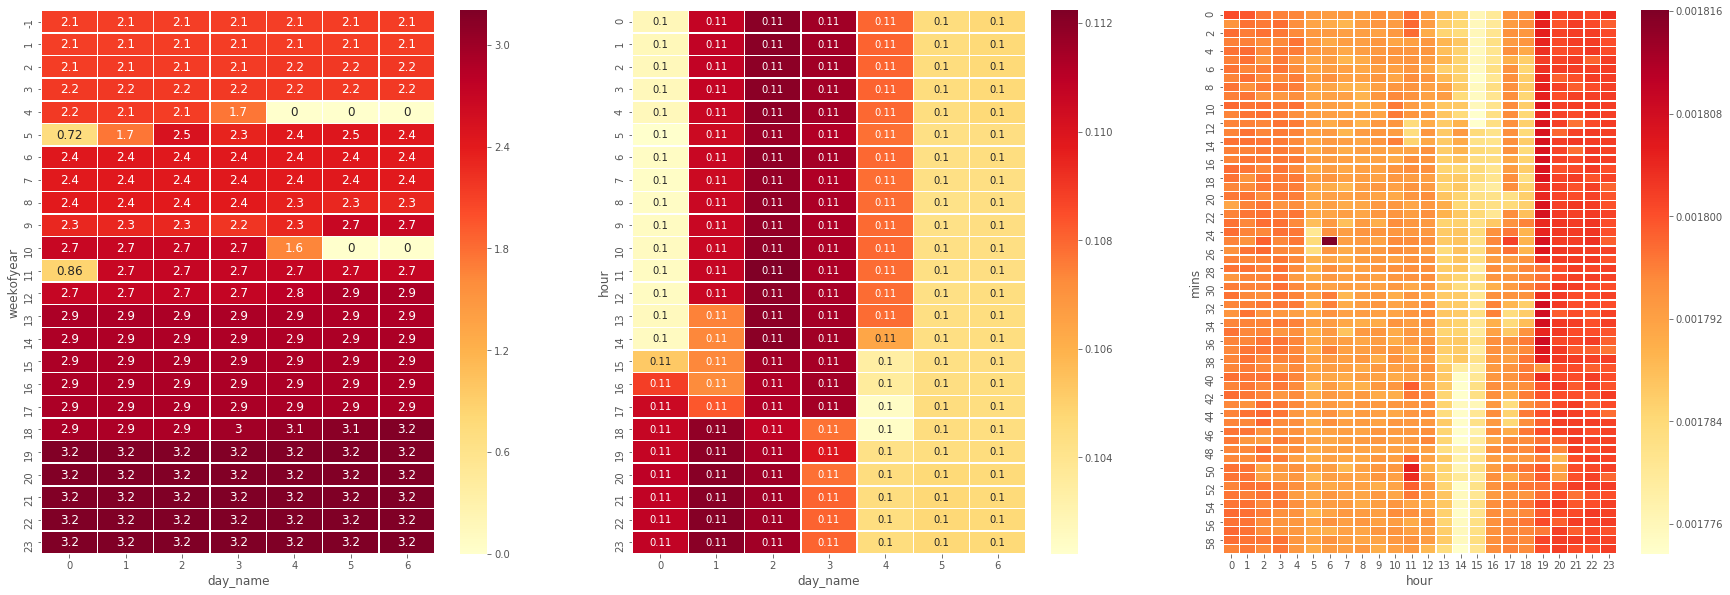

In [82]:
# heatmap of different period time trend

fig = plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
# plot week and day heatmap  
day_pi = day.pivot("weekofyear", "day_name", "day_kWh")
ax0 = sns.heatmap(day_pi, linewidth=0.5, annot=True,cmap="YlOrRd",annot_kws={"size": 12})

plt.subplot(1, 3, 2)
# plot day and hour heatmap  
hour_pi =hour.reset_index().pivot_table("hour_kWh", "hour","day_name" )
ax1 = sns.heatmap(hour_pi,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

plt.subplot(1, 3, 3)
# plot hour and minute heatmap
mins_pi =minute.reset_index().pivot_table( "minute_kWh", "mins","hour")
ax2 = sns.heatmap(mins_pi,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 8})

In [84]:
df['kWh'].fillna(method='ffill',limit=305, inplace=True)

In [85]:
# assum missing value would be as normal pattern before lockdown, so replace the value same as the week before 
import math
for i in range(0,725760):
    if math.isnan(float(df['kWh'][i])):
        df['kWh'][i]= df['kWh'][i-60480]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [86]:
# assum missing value would be as normal pattern after lockdown, so replace the value same as the week before 
for i in range(725760,len(df)):
    if math.isnan(float(df['kWh'][i])):
        df['kWh'][i]= df['kWh'][i+60480]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1451520 entries, 2019-12-23 00:00:00 to 2020-06-07 23:59:50
Data columns (total 7 columns):
mean_power    1388702 non-null float64
weekofyear    1451520 non-null int64
day_name      1451520 non-null int64
hour          1451520 non-null int64
mins          1451520 non-null int64
day_type      1451520 non-null object
kWh           1451520 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 88.6+ MB


In [94]:
df1=df[['mean_power','weekofyear','day_name','hour','mins','day_type','kWh']]
# using sqlite as the database 
from sqlalchemy import create_engine
engine = create_engine('sqlite:///dissertation.db', echo=True) #set the database name as dissertation.db
sqlite_connection = engine.connect()
sqlite_table = "cloud"       #set the table name as rainfall_data
df.to_sql(sqlite_table, sqlite_connection, if_exists='replace')  # import dataframe to sqlite

2020-07-27 06:54:40,134 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-07-27 06:54:40,142 INFO sqlalchemy.engine.base.Engine ()
2020-07-27 06:54:40,147 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-07-27 06:54:40,152 INFO sqlalchemy.engine.base.Engine ()
2020-07-27 06:54:41,975 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("cloud")
2020-07-27 06:54:41,977 INFO sqlalchemy.engine.base.Engine ()
2020-07-27 06:54:41,987 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE cloud (
	time DATETIME, 
	mean_power FLOAT, 
	weekofyear BIGINT, 
	day_name BIGINT, 
	hour BIGINT, 
	mins BIGINT, 
	day_type TEXT, 
	"kWh" FLOAT
)


2020-07-27 06:54:41,990 INFO sqlalchemy.engine.base.Engine ()
2020-07-27 06:54:42,427 INFO sqlalchemy.engine.base.Engine COMMIT
2020-07-27 06:54:42,428 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_cloud_time ON cloud (time)
2020-07-27 06:54:42,429 INFO sqlalchem

In [92]:
sqlite_connection.close() # close the connection

## Data already cleaned and saved

the following is going to use copy one


In [89]:
df_engineering= df.copy()

In [90]:
# prepare summed weekly, daily, and hourly patterns
week = pd.DataFrame({'Week_kWh' : (df.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df.groupby( ['weekofyear','day_name'])['kWh'].sum())}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df.groupby( ['weekofyear','day_name','hour'])['kWh'].sum())}).reset_index()
minute = pd.DataFrame({'minute_kWh' : (df.groupby( ['weekofyear','day_name','hour','mins'])['kWh'].sum())}).reset_index()

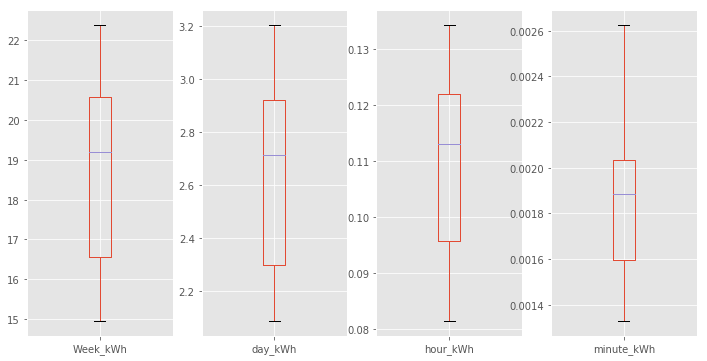

In [91]:
# boxplots of power consumption 
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
weekbp = week.boxplot(column=['Week_kWh'])

plt.subplot(1, 4, 2)
daybp = day.boxplot(column=['day_kWh'])

plt.subplot(1, 4, 3)
hourbp = hour.boxplot(column=['hour_kWh'])

plt.subplot(1, 4, 4)
minsbp = minute.boxplot(column=['minute_kWh'])

In [110]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,18.800640
std,7.144345,2.729446
min,-1.000000,14.953293
25%,5.750000,16.556343
50%,11.500000,19.197905
75%,17.250000,20.586479
max,23.000000,22.391349


In [109]:
week_pattern=df_engineering.set_index(df.index)['2020-02-03 00:00:00' :'2020-06-07 23:59:50']
week_pattern.describe()

,mean_power,weekofyear,day_name,hour,mins,kWh
count,1.061485e+06,1.088640e+06,1.088640e+06,1.088640e+06,1.088640e+06,1.088640e+06
mean,1.190590e+02,1.450000e+01,3.000000e+00,1.150000e+01,2.950000e+01,3.302081e-04
std,1.218430e+01,5.188130e+00,2.000001e+00,6.922190e+00,1.731811e+01,3.361132e-05
min,9.400000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.611111e-04
25%,1.120000e+02,1.000000e+01,1.000000e+00,5.750000e+00,1.475000e+01,3.111111e-04
50%,1.210000e+02,1.450000e+01,3.000000e+00,1.150000e+01,2.950000e+01,3.361111e-04
75%,1.320000e+02,1.900000e+01,5.000000e+00,1.725000e+01,4.425000e+01,3.666667e-04
max,1.610000e+02,2.300000e+01,6.000000e+00,2.300000e+01,5.900000e+01,4.472222e-04


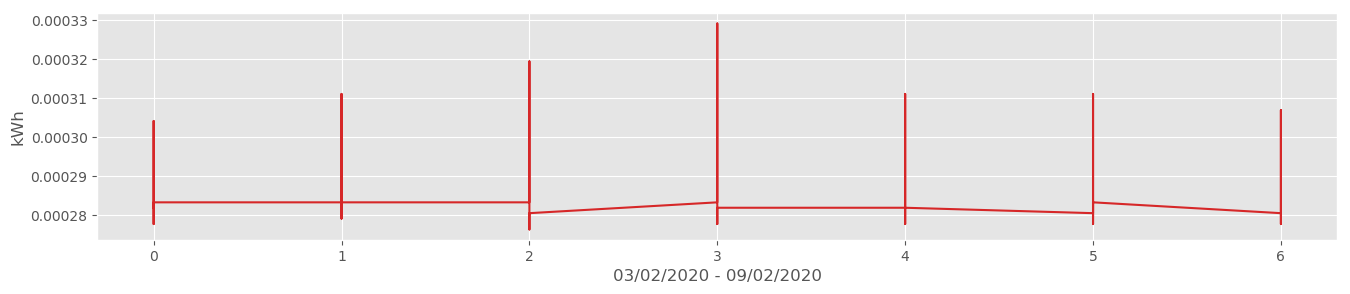

In [107]:
plot_df(week_pattern, x=week_pattern.day_name, y=week_pattern.kWh, xlabel='03/02/2020 - 09/02/2020',ylabel='kWh', title='') 

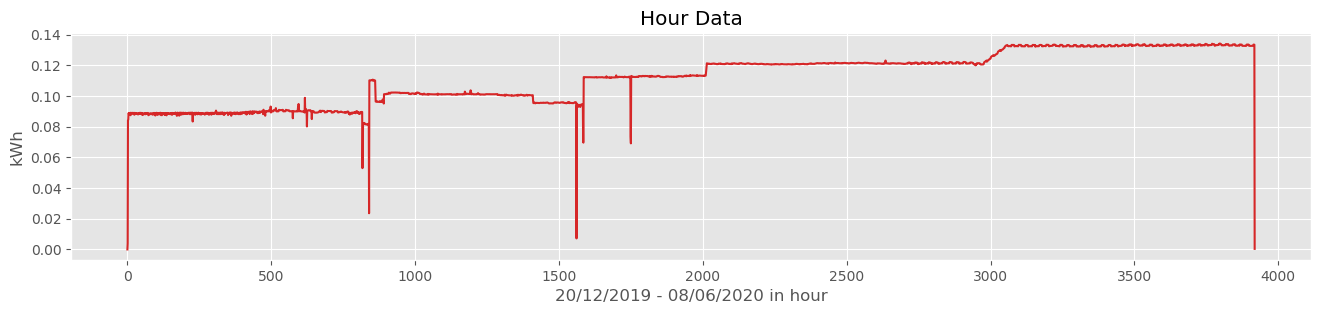

In [127]:

plot_df(hour, x=hour.index, y=hour.Hour_kWh, xlabel='20/12/2019 - 08/06/2020 in hour',ylabel='kWh', title='Hour Data') 

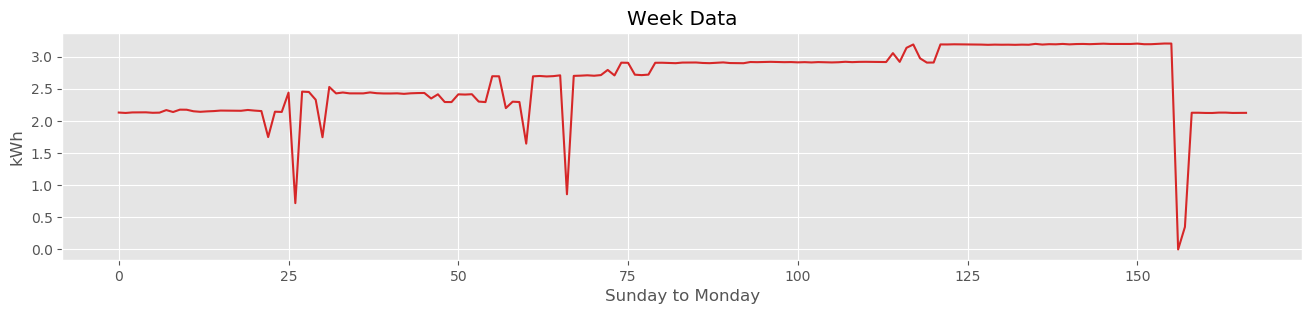

In [72]:
plot_df(day, x=day.index, y=day.Day_kWh, xlabel='Sunday to Monday',ylabel='kWh', title='Week Data') 

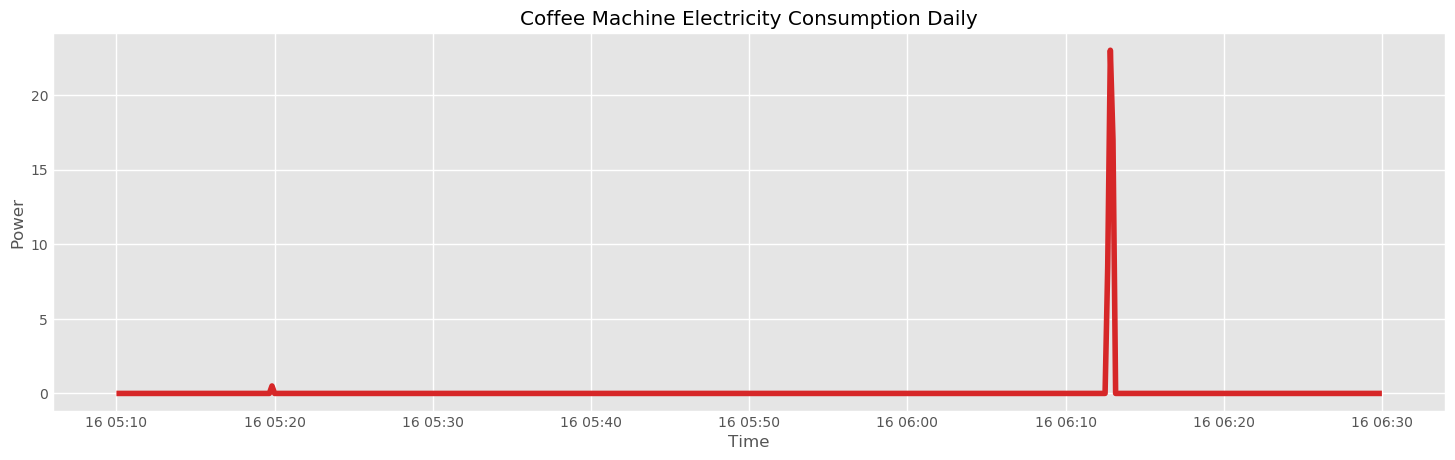

In [68]:
daily_df=df.set_index(df['time'])['2020-01-16 05:10:00' :'2020-01-16 06:30:00']
#daily_data = coffee_data.loc[coffee_data['time'].dt.day>='2020-01-02'& coffee_day['time'].dt.date<='2020-01-03']

plot_df(daily_df, x=daily_df.time, y=daily_df.mean_power, xlabel='Time',ylabel='Power', title='Coffee Machine Electricity Consumption Daily') 

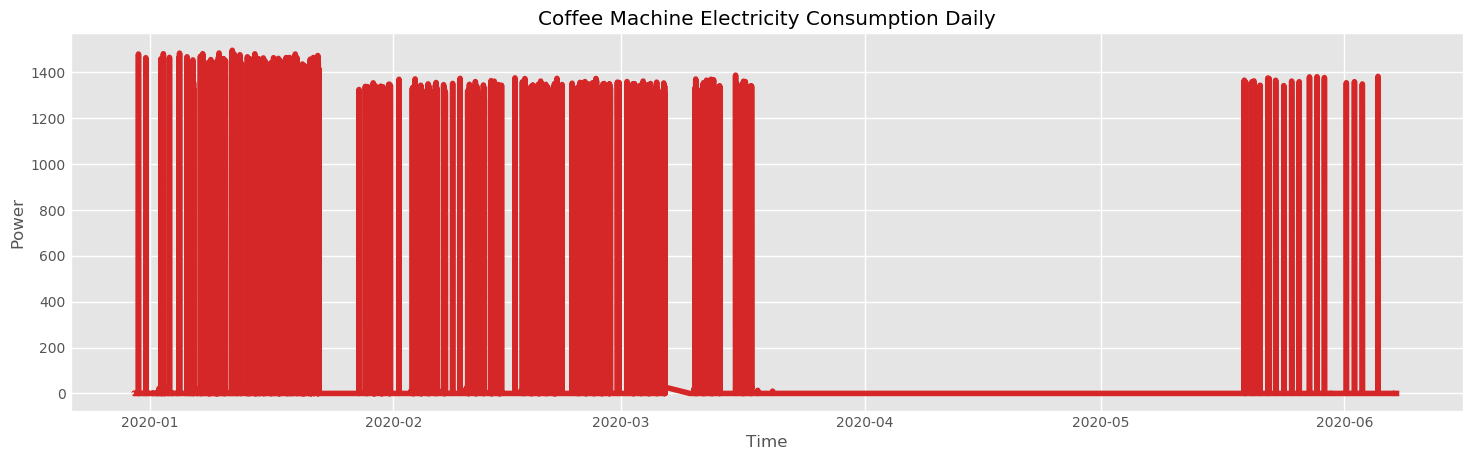

In [92]:
weekly=df.set_index(df['time'])['2019-12-30 00:00:00' :'2020-06-08 00:00:00']
plot_df(weekly, x=weekly.time, y=weekly.mean_power, xlabel='Time',ylabel='Power', title='Coffee Machine Electricity Consumption Daily') 